<h1>利用决策树进行分类

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [7]:
data = pd.concat([pd.DataFrame(iris.data),pd.DataFrame(iris.target)],axis=1)
data.columns = ['sl','sw','pl','pw','type']

In [8]:
data.head()

,sl,sw,pl,pw,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [68]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [12]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [13]:
score = model.score(X_test,y_test)

In [14]:
score

1.0

In [15]:
predict = model.predict(X_test)

In [16]:
predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [17]:
result = pd.concat([pd.DataFrame(predict),pd.DataFrame(y_test).reset_index(drop=True)],axis=1)

In [18]:
result.columns=['predict','true']

In [19]:
for i in range(0,4):
    print(data.columns[i],' 权重为 ',model.feature_importances_[i])

sl  权重为  0.016952744225471494
sw  权重为  0.0
pl  权重为  0.39586397831640935
pw  权重为  0.587183277458119


由此可知花瓣长度是鸢尾花分类的重要特征

<Figure size 800x640 with 0 Axes>

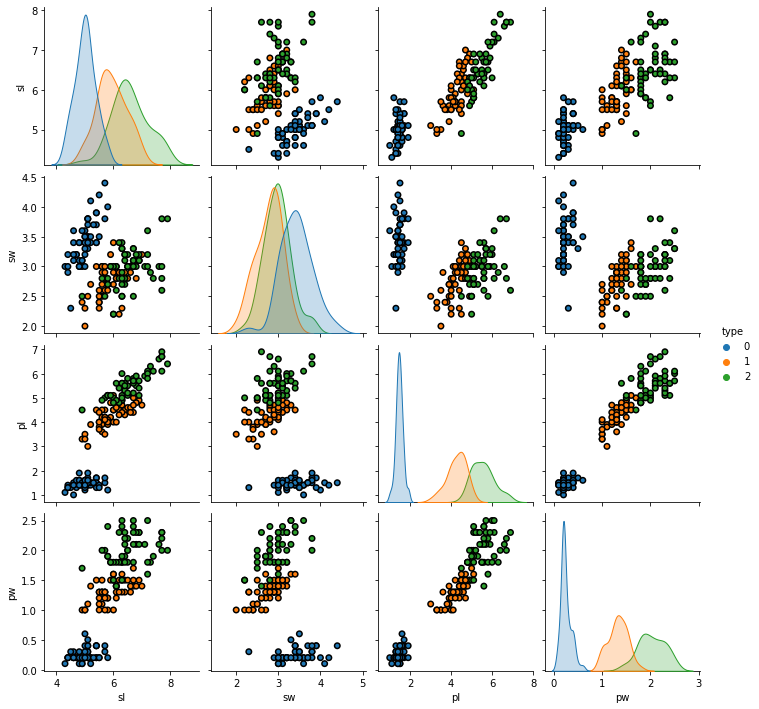

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8), dpi= 80)
current_palette = sns.color_palette()
sns.pairplot(data, kind="scatter", hue="type", palette=current_palette[0:3],plot_kws=dict(s=30, edgecolor="black", linewidth=1.5))

plt.show()

可知pl和pw对分类贡献较大，和决策树特征权重结果基本一致

In [22]:
result.head()

,predict,true
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [23]:
print("准确度为: ",(len(result[result.predict == result.true])/len(result))*100,'%')

准确度为:  100.0 %


<h5>python的配色方案

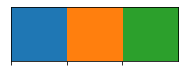

In [24]:
sns.palplot(current_palette[0:3])

In [25]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<h1>利用Kmeans进行聚类

In [26]:
from sklearn.cluster import KMeans

In [60]:
kmeans = KMeans(n_clusters = 3,random_state = 0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [154]:
kmeans.inertia_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [152]:
lut

array([2, 0, 1])

In [153]:
idx

array([1, 2, 0])

In [78]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

转换一下顺序

In [159]:
tt = {1:0,2:1,0:2}

In [165]:
li = []
for i in y_kmeans:
    li.append(tt[i])

In [167]:
li = np.array(li)
li

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

选取前两列绘制聚类散点图，原始

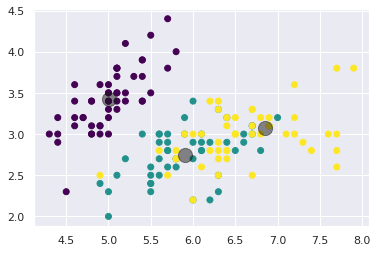

In [157]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='k', s=200, alpha=0.5)

选取前两列绘制聚类散点图，聚类

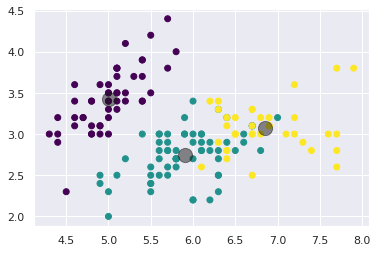

In [168]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=li, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='k', s=200, alpha=0.5)

In [173]:
result_clu = pd.concat([pd.DataFrame(li),pd.DataFrame(y)],axis=1)

In [174]:
result_clu

,0,type
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,1,2
147,2,2
148,2,2


In [176]:
result_clu.columns= ['predict','true'] 
print("准确度为: ",(len(result_clu[result_clu.predict == result_clu.true])/len(result_clu))*100,'%')

准确度为:  89.33333333333333 %
